<a href="https://colab.research.google.com/github/JoaoPauloSousaCoelho/Joao-Paulo/blob/master/Perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
y_1 = np.random.uniform(0.0, 0.6,100)
x_1 = np.random.uniform(0.0, 0.6,100)
y_2 = np.random.uniform(0.3, 1.0,100)
x_2 = np.random.uniform(0.3, 1.0,100)

In [3]:
y = np.concat([y_1, y_2])
x = np.concat([x_1, x_2])
color = np.concat([np.repeat('a', len(y_1)),np.repeat('b', len(y_2))])

In [4]:
df = pd.DataFrame({'x':x ,'y':y, 'color':color})

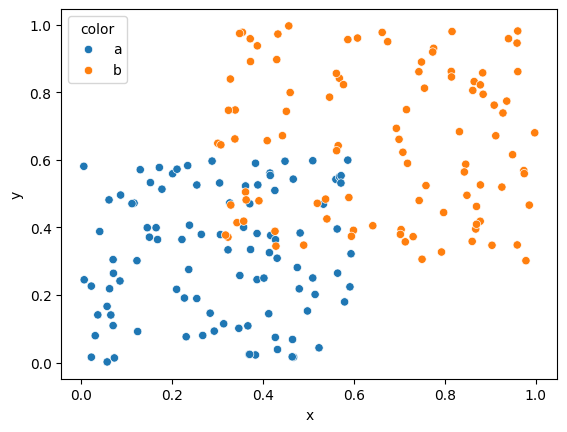

In [5]:
sns.scatterplot(x = df['x'], y = df['y'],  hue = df['color'])
plt.show()

In [ ]:
w_1 = 1.0
w_2 = -0.5
X = np.random.uniform(0,0.01,len(y))

In [ ]:
np.zeros(2)

array([0., 0.])

In [15]:
try:
  x.shape[1]
except:
  x.reshape(-1,1).T


In [60]:
class perception:
  def __init__(self, y, x, num_epochs = 100, lr = 0.1):
    self.x = x
    self.y = y
    self.num_epochs = num_epochs
    self.lr = lr

  def initialize_weights(self):
    n = self.x.shape[1]
    self.weights = np.zeros(n)

  def predict(self):
    z = np.dot(self.x, self.weights)
    self.y_pred = 1.0/(1.0 + np.exp(-z))

  def cost_function(self):
    self.predict()
    return (-self.y*np.log(self.y_pred) - (1.0 - self.y)*np.log(1-self.y_pred)).mean()

  def gradient_descent(self):
    m = len(self.y)
    self.initialize_weights()
    self.costs = []
    for i in range(self.num_epochs):
      self.predict()
      error = self.y_pred - self.y
      gradient = np.dot(self.x.T, error)/m
      self.weights -= self.lr * gradient
      cost = self.cost_function()
      if i % 100 == 0:
        print(f"Epoch {i} -- Cost: {cost}")
      self.costs.append(cost)
  def fit(self):
    self.gradient_descent()


In [40]:
df['x'].values.shape[0]

200

In [44]:
y = pd.get_dummies(df['color'], dtype = 'float', drop_first = True)['b'].values
X = np.concatenate([np.ones((df['x'].values.shape[0],1)), df['x'].values.reshape(-1,1)], axis = 1)

In [63]:
p = perception(y, X, num_epochs= 10000)

In [64]:
p.fit()

Epoch 0 -- Cost: 0.6923412041349514
Epoch 100 -- Cost: 0.6341862187197294
Epoch 200 -- Cost: 0.592066931972136
Epoch 300 -- Cost: 0.5598317976345301
Epoch 400 -- Cost: 0.5348116043546333
Epoch 500 -- Cost: 0.5150998208349542
Epoch 600 -- Cost: 0.49934178639093224
Epoch 700 -- Cost: 0.48657083946810226
Epoch 800 -- Cost: 0.47609015913621244
Epoch 900 -- Cost: 0.46739088929799577
Epoch 1000 -- Cost: 0.4600961845349156
Epoch 1100 -- Cost: 0.45392299035850725
Epoch 1200 -- Cost: 0.44865576516496813
Epoch 1300 -- Cost: 0.44412822636225596
Epoch 1400 -- Cost: 0.44021051645551124
Epoch 1500 -- Cost: 0.4368000636047002
Epoch 1600 -- Cost: 0.43381498868662577
Epoch 1700 -- Cost: 0.4311892888809081
Epoch 1800 -- Cost: 0.4288692759908245
Epoch 1900 -- Cost: 0.4268109118667197
Epoch 2000 -- Cost: 0.42497779291335447
Epoch 2100 -- Cost: 0.42333960964168116
Epoch 2200 -- Cost: 0.42187095771701066
Epoch 2300 -- Cost: 0.42055041180901803
Epoch 2400 -- Cost: 0.4193597978790436
Epoch 2500 -- Cost: 0.418

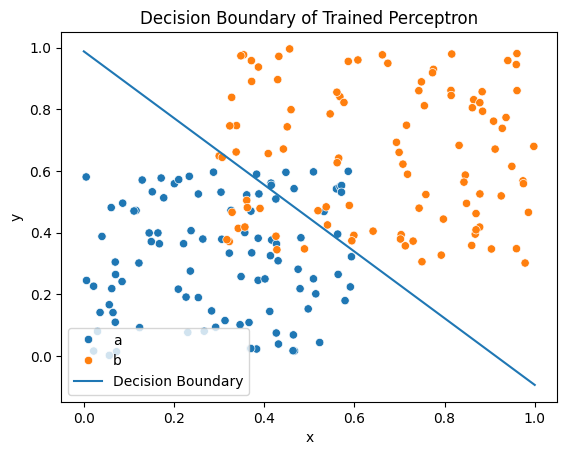

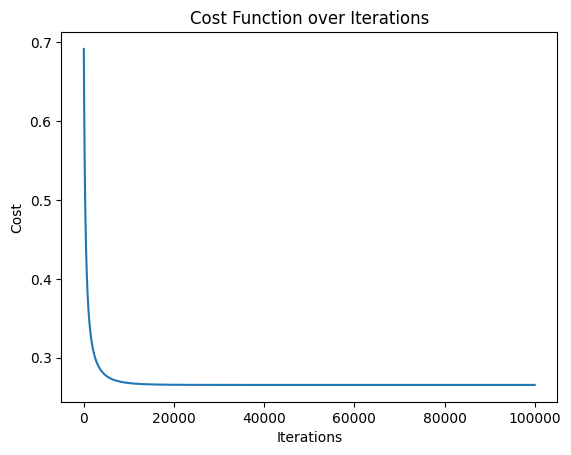

In [6]:
# prompt: I want a code (gradient descent) to train a perception model to classify a problem. I want to see the boundary decision on a graph

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

def cost_function(X, y, weights):
    predictions = predict(X, weights)
    cost = (-y * np.log(predictions) - (1 - y) * np.log(1 - predictions)).mean()
    return cost

def gradient_descent(X, y, learning_rate, num_iterations):
    m = len(y)
    weights = np.zeros(X.shape[1])  # Initialize weights to zero

    costs = []
    for i in range(num_iterations):
        predictions = predict(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient
        costs.append(cost_function(X, y, weights))
    return weights, costs

# Prepare the data for the perceptron
X = df[['x', 'y']].values
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1) # Add a bias term (intercept)
y = np.where(df['color'] == 'a', 0, 1) #Convert labels to 0 and 1


learning_rate = 0.1
num_iterations = 100000
weights, costs = gradient_descent(X, y, learning_rate, num_iterations)

# Plot the decision boundary
x_values = np.linspace(0, 1, 100)
y_values = -(weights[0] + weights[1] * x_values) / weights[2]


sns.scatterplot(x = df['x'], y = df['y'],  hue = df['color'])
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary of Trained Perceptron')
plt.legend()
plt.show()

# Plot the cost function over iterations (optional)
plt.plot(range(num_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


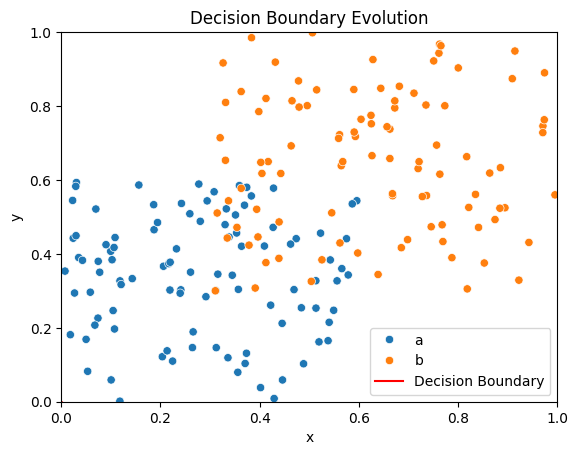

In [ ]:
# prompt: I want a code (gradient descent) to train a perception model to classify a problem. I want to see the boundary decision on a graph. I want to see the boundary decision as the model are being trained

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ... (Your existing code for data generation and initialization) ...

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

def cost_function(X, y, weights):
    predictions = predict(X, weights)
    cost = (-y * np.log(predictions) - (1 - y) * np.log(1 - predictions)).mean()
    return cost

def gradient_descent(X, y, learning_rate, num_iterations):
    m = len(y)
    weights = np.zeros(X.shape[1])  # Initialize weights to zero

    costs = []
    weights_history = [] # Store weights at each iteration

    for i in range(num_iterations):
        predictions = predict(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient
        costs.append(cost_function(X, y, weights))
        weights_history.append(weights.copy()) #Append weights to history
    return weights, costs, weights_history


# ... (Your existing code for data preparation) ...


learning_rate = 0.1
num_iterations = 1000
weights, costs, weights_history = gradient_descent(X, y, learning_rate, num_iterations)

# Animation setup
fig, ax = plt.subplots()
sns.scatterplot(x=df['x'], y=df['y'], hue=df['color'], ax=ax)
line, = ax.plot([], [], 'r-', label='Decision Boundary') #Create empty line object
ax.set_xlim(0, 1) #Set x axis limits
ax.set_ylim(0, 1) #Set y axis limits
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary Evolution')
plt.legend()


def animate(i):
    weights_i = weights_history[i] #Get the weight at iteration i
    x_values = np.linspace(0, 1, 100)
    y_values = -(weights_i[0] + weights_i[1] * x_values) / weights_i[2]
    line.set_data(x_values, y_values)
    return line, #Need to return an iterable


animation = FuncAnimation(fig, animate, frames=num_iterations, interval=50, blit=True)
plt.show()
